<a href="https://colab.research.google.com/github/rhaalves/cianetacao/blob/master/cianetacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd;
import numpy as np;
from datetime import datetime;
import matplotlib.pyplot as plt;

In [0]:
url_fit019 = 'https://raw.githubusercontent.com/rhaalves/cianetacao/master/fit019.csv';
url_fit002 = 'https://raw.githubusercontent.com/rhaalves/cianetacao/master/fit002.csv';
url_aic001 = 'https://raw.githubusercontent.com/rhaalves/cianetacao/master/aic001.csv';


In [0]:
fit019_df = pd.read_csv(url_fit019, sep=';');
fit002_df = pd.read_csv(url_fit002, sep=';');
aic001_df = pd.read_csv(url_aic001, sep=';');

In [0]:
fit019_df['value'] = fit019_df['value'].astype('float64');
fit002_df['value'] = fit002_df['value'].astype('float64');
aic001_df['value'] = aic001_df['value'].astype('float64');

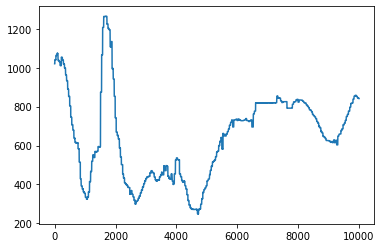

In [5]:
plt.plot(aic001_df['value']);

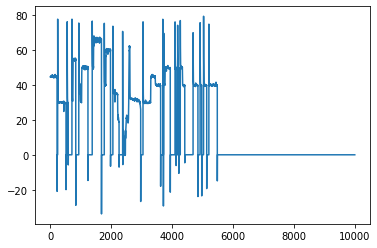

In [6]:
plt.plot(fit002_df['value']);

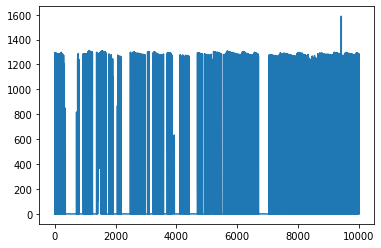

In [7]:
plt.plot(fit019_df['value']);

In [0]:
#calculo de Massa Seca
#ms = (V*Ds(Dp-1))/(Ds-1)

ds = 3.97; 
dt = 1.57;

fit002_df['massa_seca'] = fit002_df['valor_fit002']*ds*(dt-1)/(ds-1)
fit002_df['massa_seca_avg'] = fit002_df['fit002_avg']*ds*(dt-1)/(ds-1)

In [0]:
#calculo de médias móveis
mavg_win = 250;

In [0]:
fit019_df['fit019_avg'] = fit019_df.iloc[:,1].rolling(window=mavg_win).mean(); 
fit019_df.rename(columns= {'timestamp': 'data_fit019',
                           'value': 'valor_fit019'},
                 inplace = True);

fit002_df['fit002_avg'] = fit002_df.iloc[:,1].rolling(window=mavg_win).mean(); 
fit002_df.rename(columns= {'timestamp': 'data_fit002',
                           'value': 'valor_fit002'},
                 inplace = True);

aic001_df['aic001_avg'] = aic001_df.iloc[:,1].rolling(window=mavg_win).mean(); 
aic001_df.rename(columns= {'timestamp': 'data_aic001',
                           'value': 'valor_aic001'},
                 inplace = True);                               


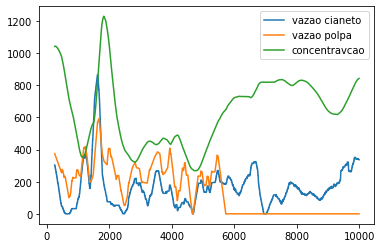

In [20]:
plt.plot(fit019_df['fit019_avg'], label = 'vazao cianeto');
plt.plot(fit002_df['fit002_avg']*9, label = 'vazao polpa');
plt.plot(aic001_df['aic001_avg'], label = 'concentravcao');
plt.legend();

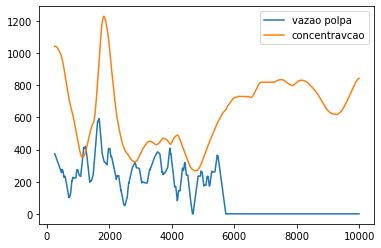

In [22]:
plt.plot(fit002_df['fit002_avg']*9, label = 'vazao polpa');
plt.plot(aic001_df['aic001_avg'], label = 'concentravcao');
plt.legend();

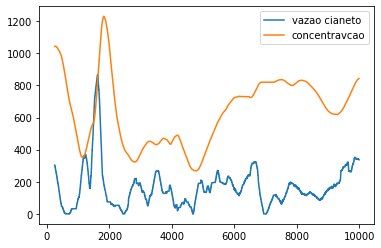

In [23]:
plt.plot(fit019_df['fit019_avg'], label = 'vazao cianeto');
plt.plot(aic001_df['aic001_avg'], label = 'concentravcao');
plt.legend();